# Plotting DM spectra from PPPC4DMID

So, with the fits table created in the previous example, I will plot some spectra

In [1]:
%matplotlib inline
import gammalib
import matplotlib.pyplot as plt

In [2]:
#    Reading fits file with spectra
fname  = 'PPPC4DMIDGammasEW.fits'
ftable = gammalib.GFits( fname )

print( ftable )

=== GFits ===
 Filename ..................: PPPC4DMIDGammasEW.fits
 History ...................: existing file
 Mode ......................: read/write
 Number of HDUs ............: 5
=== GFitsImage ===
 HDU number ................: 0
 HDU name ..................: Primary
 Image type ................: unsigned byte
 Number of dimensions ......: 0
 Number of image pixels ....: 0
=== GFitsTable ===
 HDU number ................: 1
 HDU name ..................: DM-Masses
 Table type ................: Binary table
 Number of rows ............: 62
 Number of columns .........: 1
=== GFitsTable ===
 HDU number ................: 2
 HDU name ..................: log(E/m_DM)
 Table type ................: Binary table
 Number of rows ............: 179
 Number of columns .........: 1
=== GFitsTable ===
 HDU number ................: 3
 HDU name ..................: Channels
 Table type ................: Binary table
 Number of rows ............: 28
 Number of columns .........: 1
=== GFitsTable ===
 

In [3]:
# getting spectra table
dndx = ftable[ 'DMSpectra' ]

In [4]:
# getting spectra for channel tau
spec_tau = dndx[ 'Tau' ]

In [5]:
#    get E/m_DM values
x    = []
for index in range( ftable[ 'log(E/m_DM)' ].nrows() ) :
    x.append( ftable[ 'log(E/m_DM)' ][ 0 ].real( index ) )
    

In [6]:
#    Get spectra for 5 TeV and 10 TeV
speca  = []
specb = []
for index in range( spec_tau.number() ) :
    speca.append( spec_tau[ 50 , index ] )
    specb.append( spec_tau[ 55 , index ] )


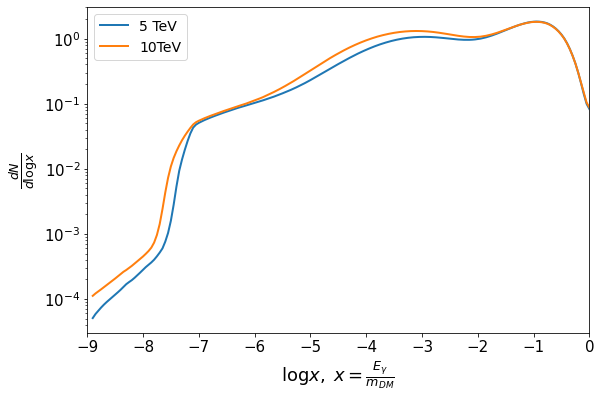

In [7]:
fig , ax = plt.subplots( figsize=( 9 , 6 ) )

ax.set_xlim( -9 , 0 )
ax.set_xlabel( '$\\log{x},\;x=\\frac{E_{\\gamma}}{m_{DM}}$' , fontsize=18 )
ax.set_ylabel( '$\\frac{dN}{d\\log{x}}$' , fontsize=18 )

# ax.set_xscale( 'log' )
ax.set_yscale( 'log' )

ax.tick_params( labelsize=15 )

ax.plot( x , speca , label='5 TeV' , lw=2 )
ax.plot( x , specb , label='10TeV' , lw=2 )

ax.legend( loc='best' , prop={ 'size': 14 } )